In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.image as img
import os,glob
import cv2
from PIL import Image

1. 이미지 전처리

In [ ]:
# 경로 가져오기
train_OK=r"/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/OK_jpg"
valid_OK="/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/OK_jpg"
test_OK="/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/OK_jpg"
train_NG="/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/NG_jpg"
valid_NG="/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/NG_jpg"
test_NG="/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/NG_jpg"
test_pre="/content/drive/MyDrive/MNVISION/image/ng,ok/4. test_predict/test_jpg"

In [ ]:
# 이미지 파일명 불러오기
train_OK_files = os.listdir(train_OK)
train_OK=[]
for i in train_OK_files:
  train_OK.append(i)

valid_OK_files = os.listdir(valid_OK)
valid_OK=[]
for i in valid_OK_files:
  valid_OK.append(i)

test_OK_files = os.listdir(test_OK)
test_OK=[]
for i in test_OK_files:
  test_OK.append(i)

train_NG_files = os.listdir(train_NG)
train_NG=[]
for i in train_NG_files:
  train_NG.append(i)

valid_NG_files = os.listdir(valid_NG)
valid_NG=[]
for i in valid_NG_files:
  valid_NG.append(i)

test_NG_files = os.listdir(test_NG)
test_NG=[]
for i in test_NG_files:
  test_NG.append(i)


test_files = os.listdir(test_pre)
test_pre=[]
for i in test_files:
  test_pre.append(i)

In [ ]:
# 이미지 크롭
# 2448, 2058
# for i in range(0,38):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/OK_jpg/"+train_OK[i])
#   img_cropped = img.crop((700,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/OK_jpg/"+train_OK[i])

In [ ]:
# for i in range(0,12):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/OK_jpg/"+valid_OK[i])
#   img_cropped = img.crop((700,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/OK_jpg/"+valid_OK[i])

In [ ]:
# for i in range(0,10):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/OK_jpg/"+test_OK[i])
#   img_cropped = img.crop((700,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/OK_jpg/"+test_OK[i])

In [ ]:
# for i in range(0,38):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/NG_jpg/"+train_NG[i])
#   img_cropped = img.crop((600,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/NG_jpg/"+train_NG[i])

In [ ]:
# for i in range(0,12):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/NG_jpg/"+valid_NG[i])
#   img_cropped = img.crop((700,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid/NG_jpg/"+valid_NG[i])

In [ ]:
# for i in range(0,10):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/NG_jpg/"+test_NG[i])
#   img_cropped = img.crop((600,300,1650,1500))
  # img_cropped.show()
  # img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/NG_jpg/"+test_NG[i])

In [ ]:
# for i in range(0,20):
#   img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/test_jpg/"+test[i])
#   img_cropped = img.crop((600,300,1650,1500))
#   img_cropped.show()
#   img_cropped.save("/content/drive/MyDrive/MNVISION/image/ng,ok/3. test/test_jpg/"+test[i])

In [ ]:
# 크롭된 이미지 shape
img=[]
for i in range(0,38):
  img=cv2.imread("/content/drive/MyDrive/MNVISION/image/ng,ok/1. train/OK_jpg/"+train_OK[i])
img.shape

(1200, 950, 3)

In [ ]:
# train,valid path 지정
train_path="/content/drive/MyDrive/MNVISION/image/ng,ok/1. train"
valid_path="/content/drive/MyDrive/MNVISION/image/ng,ok/2. valid"
test_path="/content/drive/MyDrive/MNVISION/image/ng,ok/3. test"

2. 모델 생성

94668760/94668760 [==============================] - 1s 0us/step


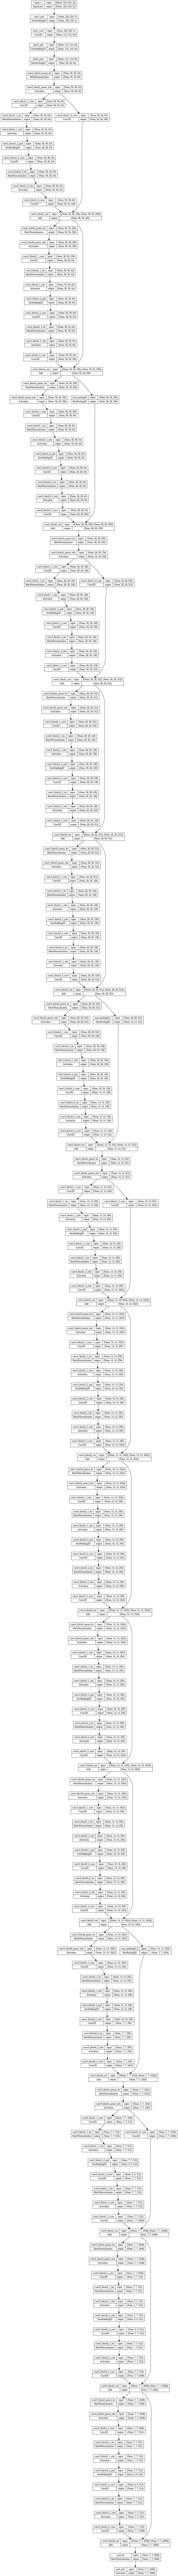

In [ ]:
# ResNet
# Pre-trained 모델을 사전 학습된 가중치와 함께 가져오기
from tensorflow.keras.applications import ResNet50V2

# weights가 'imagenet'으로 설정되면 모델이 ImageNet 데이터세트의 사전 훈련된 가중치로 초기화
pre_trained_base = ResNet50V2(include_top=False,
                              weights='imagenet',
                              input_shape=[224, 224, 3])

# 사전 학습된 가중치를 업데이트 되지 않도록 설정
pre_trained_base.trainable = False

# 모델 구조 시각화
from tensorflow.keras.utils import plot_model
plot_model(pre_trained_base,show_shapes=True,show_layer_names=True,to_file='resenet50.png')

In [ ]:
# 모델 생성
def build_model():
  model = tf.keras.Sequential([
      # Pre-trained Base
      pre_trained_base,
      # Classifier 출력층
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
      tf.keras.layers.Dropout(0.3),

      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(0.3),

      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  return model
# 모델 구조
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
# 데이터 증강
# 이미지 데이터 제너레이터 정의(horizontal_flip 적용)
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
image=ImageDataGenerator(rescale=1/255.,
                        horizontal_flip=True)

train = image.flow_from_directory(train_path,
                                  batch_size=10,
                                  target_size=(224,224),
                                  classes=['OK_jpg','NG_jpg'],
                                  class_mode='binary',
                                  seed=2020)

valid = image.flow_from_directory(valid_path,
                                  batch_size=10,
                                  target_size=(224,224),
                                  classes=['OK_jpg','NG_jpg'],
                                  class_mode='binary',
                                  seed=2020)


Found 76 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


(10, 224, 224, 3) (10,)


<ipython-input-16-708063986ef3>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


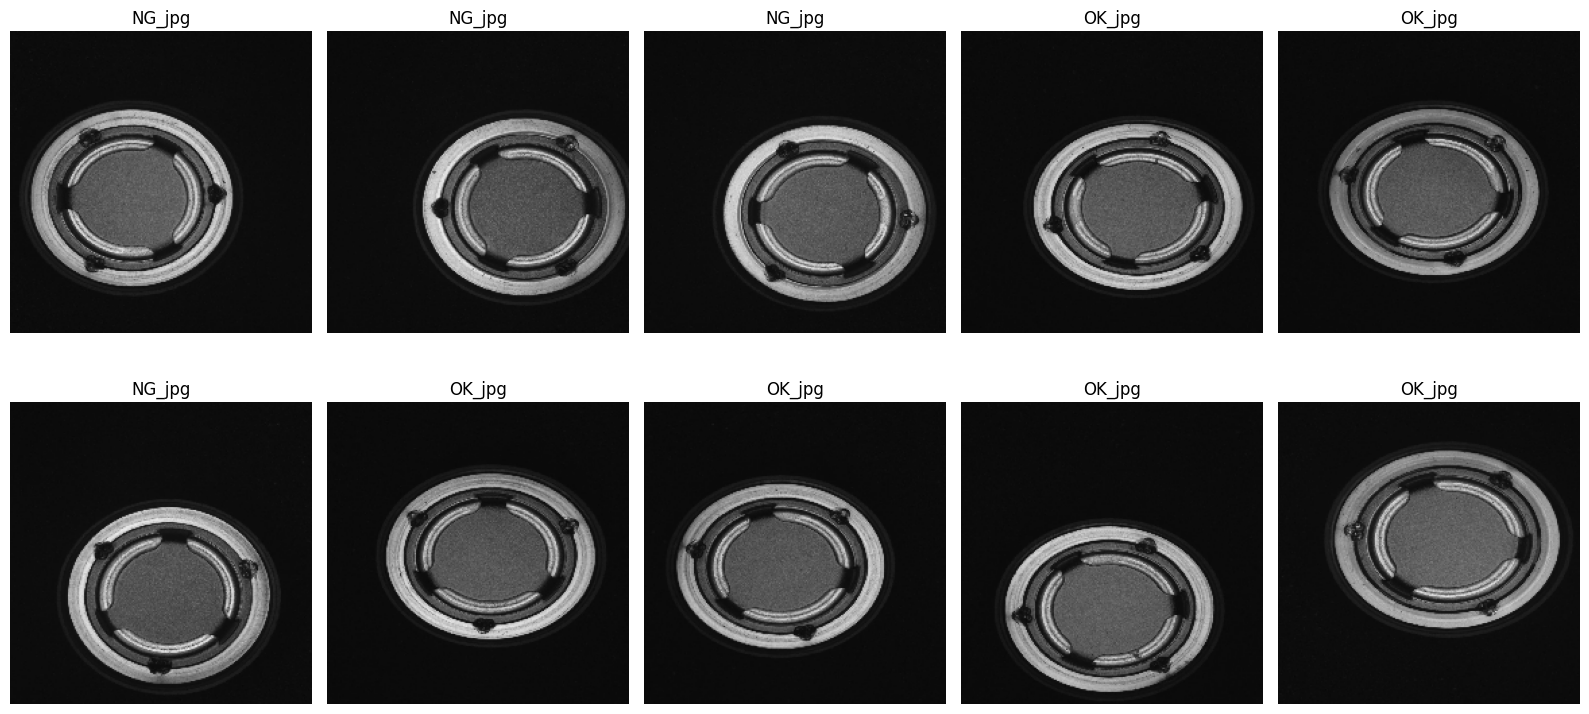

In [ ]:
# 샘플 이미지 출력

class_labels = ['OK_jpg','NG_jpg']
batch = next(train)
images,labels = batch[0],batch[1]
print(images.shape,labels.shape)

plt.figure(figsize=(16,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
# 모델 생성
model1 = build_model()

# 모델 컴파일
model1.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 체크포인트 설정
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt',
                                              save_weights_only=True,
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1)

In [ ]:
# 모델 훈련
history1=model1.fit(train,validation_data=valid,epochs=100, batch_size=10,callbacks=[checkpoint])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - ETA: 0s - loss: 9.3575 - accuracy: 0.4868
Epoch 1: val_loss improved from inf to 3.60234, saving model to tmp_checkpoint.ckpt
8/8 [==============================] - 30s 2s/step - loss: 9.3575 - accuracy: 0.4868 - val_loss: 3.6023 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 7.3174 - accuracy: 0.6316
Epoch 2: val_loss improved from 3.60234 to 0.71899, saving model to tmp_checkpoint.ckpt
8/8 [==============================] - 3s 356ms/step - loss: 7.3174 - accuracy: 0.6316 - val_loss: 0.7190 - val_accuracy: 0.8333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 4.1484 - accuracy: 0.7368
Epoch 3: val_loss did not improve from 0.71899
8/8 [==============================] - 2s 238ms/step - loss: 4.1484 - accuracy: 0.7368 - val_loss: 2.1057 - val_accuracy: 0.6667
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 3.7065 - accuracy: 0.7500
Epoch 4: val_loss did not improve fr

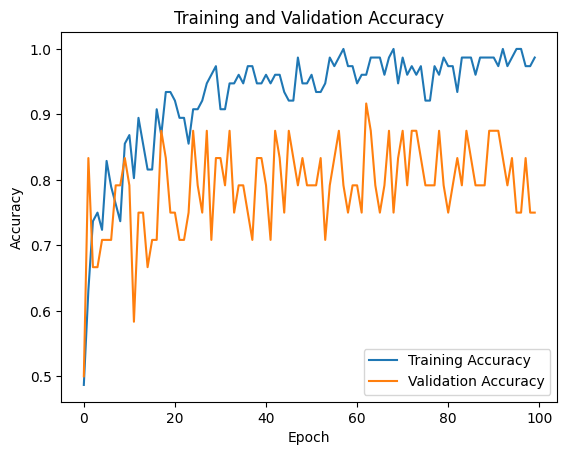

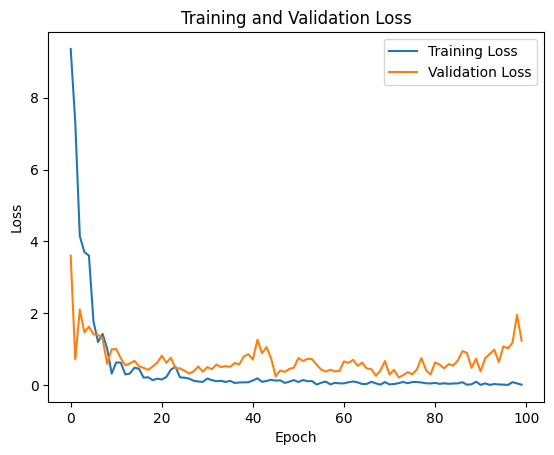

In [ ]:
# 손실함수, 정확도 그래프
#그래프 코드
training_accuracy = history1.history['accuracy']
validation_accuracy = history1.history['val_accuracy']
training_loss = history1.history['loss']
validation_loss = history1.history['val_loss']

# 정확도 그래프
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실률 그래프
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# test data
image1=ImageDataGenerator(rescale=1/255.,
                        horizontal_flip=True)
test = image1.flow_from_directory(test_path,
                                  batch_size=10,
                                  target_size=(224,224),
                                  classes=['OK_jpg','NG_jpg'],
                                  class_mode='binary',
                                  seed=2020)


Found 20 images belonging to 2 classes.


In [ ]:
# 모델 성능
# 모델 체크포인트 로드 전
loss,acc=score = model1.evaluate(test, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:', round(score[1]*100,2))
# 모델 체크포인트 파일을 모델에 로드
model1.load_weights('tmp_checkpoint.ckpt')
loss,acc=score = model1.evaluate(test, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:',round(score[1]*100,2))

Test loss: 0.13
Test accuracy: 100.0
Test loss: 1.34
Test accuracy: 100.0


In [ ]:
# 테스트 이미지 전처리
img_test=[]
for i in range(len(test_pre)):
  img=Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/4. test_predict/test_jpg/"+test_pre[i])
  img = img.resize((224, 224))  # Resize the image to match model input size
  img = np.array(img) / 255.0  # Normalize the pixel values
  img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch
  img_test.append(img)
len(img_test)


20

In [ ]:
# 테스트 이미지 라벨 지정
img_label=[]
for f in test_pre:

  if f.find("OK")>=0:
    img_label.append(0)
  else:
    img_label.append(1)

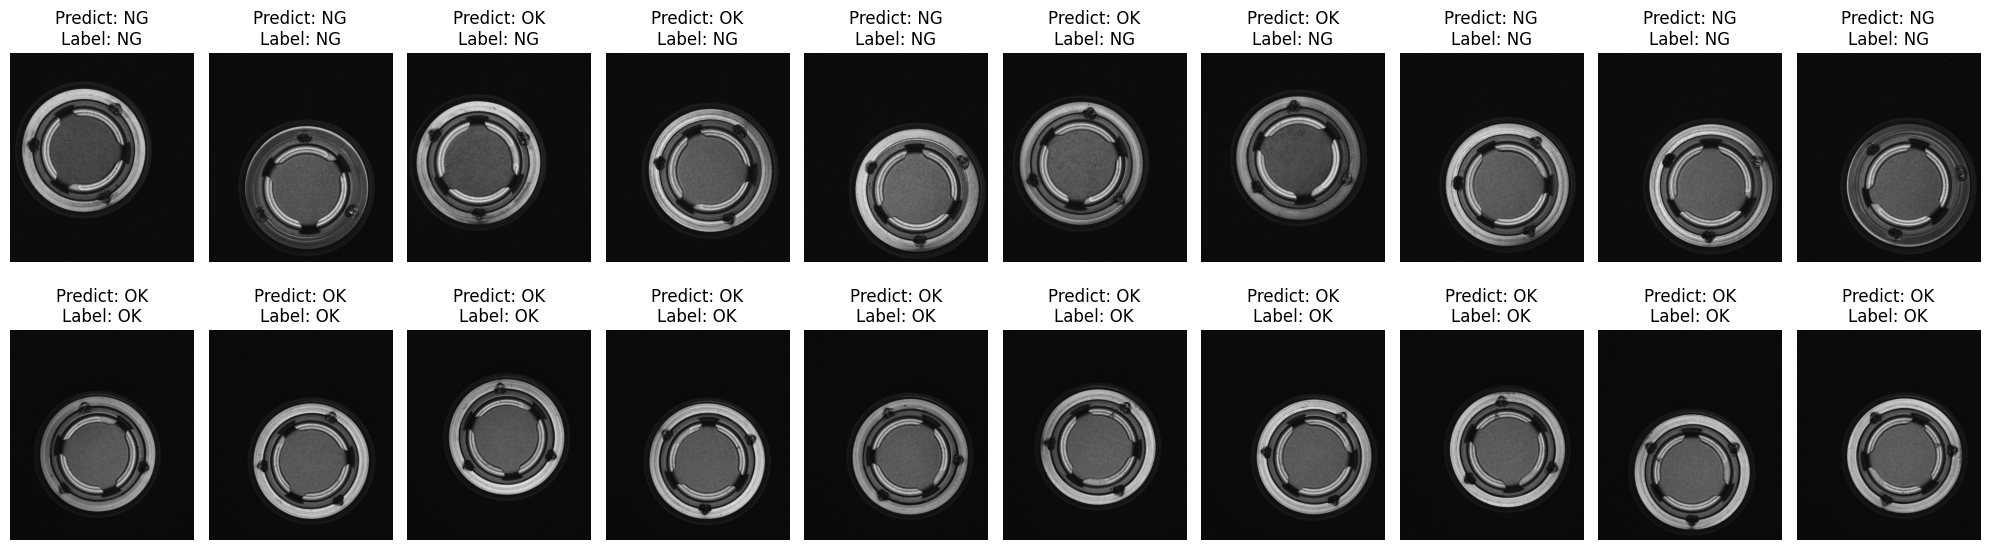

In [ ]:
# predict 값과 실제 label 비교
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 10
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i in range(num_images):
    img = Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/4. test_predict/test_jpg/"+test_pre[i])
    pre_y = model1.predict(img_test[i], verbose=0)
    target_y = img_label[i]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Predict: {'NG' if pre_y > 0.5 else 'OK'}\nLabel: {'NG' if target_y > 0.5 else 'OK'}")

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 증강
# 이미지 데이터 제너레이터 정의(horizontal_flip=True,rotation_range=10,zoom_range=0.3 적용)
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
image_gen=ImageDataGenerator(rescale=1/255.,
                            horizontal_flip=True,
                            rotation_range=10,
                            )

train_gen = image_gen.flow_from_directory(train_path,
                                          batch_size=10,
                                          target_size=(224,224),
                                          classes=['OK_jpg','NG_jpg'],
                                          class_mode='binary',
                                          seed=2020)

valid_gen = image_gen.flow_from_directory(valid_path,
                                          batch_size=10,
                                          target_size=(224,224),
                                          classes=['OK_jpg','NG_jpg'],
                                          class_mode='binary',
                                          seed=2020)


Found 76 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


(10, 224, 224, 3) (10,)


<ipython-input-27-f0c383286142>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


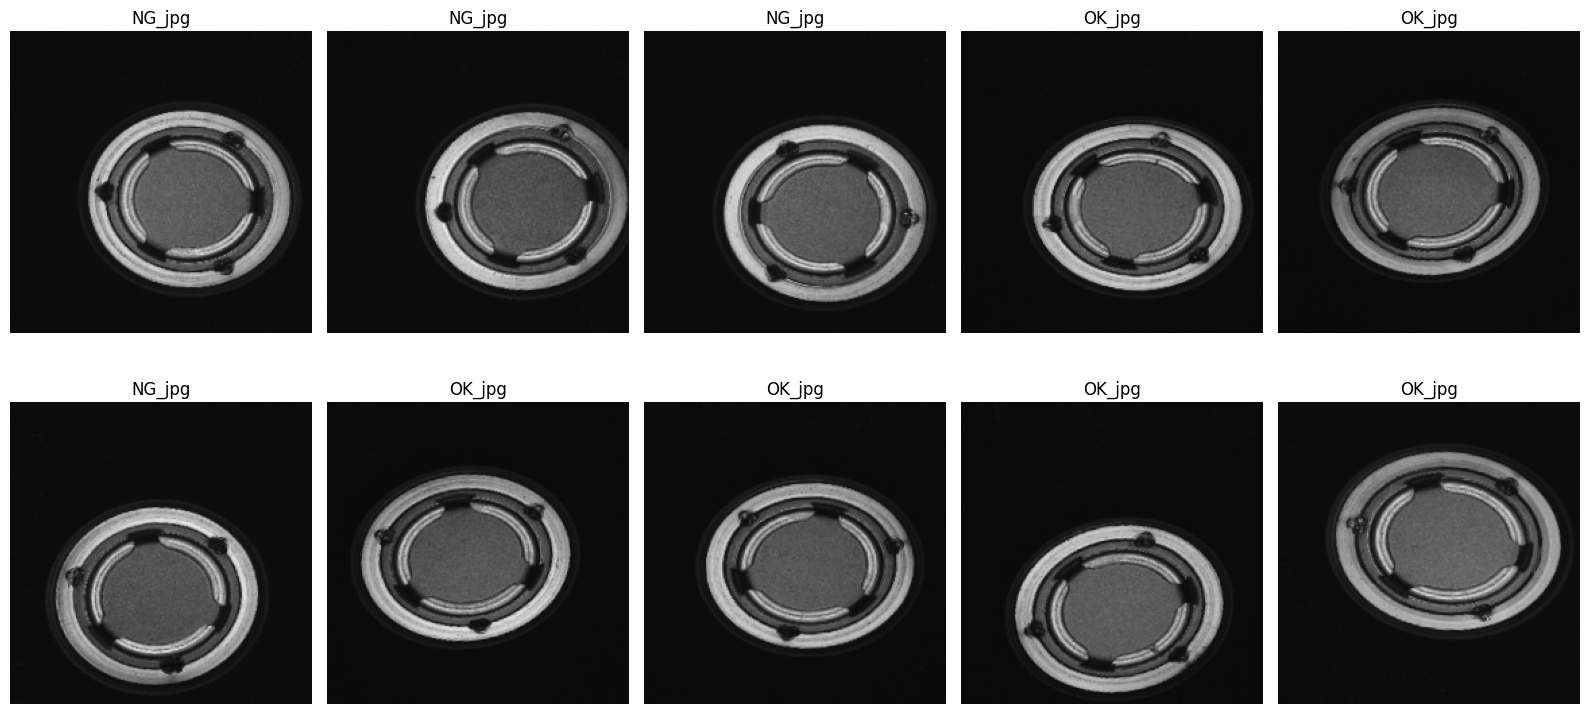

In [ ]:
# 샘플 이미지 출력

class_labels = ['OK_jpg','NG_jpg']
batch = next(train_gen)
images,labels = batch[0],batch[1]
print(images.shape,labels.shape)

plt.figure(figsize=(16,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 모델 생성
model2 = build_model()

# 모델 컴파일
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 체크포인트 설정
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt',
                                              save_weights_only=True,
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1)

In [ ]:
# 모델 훈련
history2=model2.fit(train_gen,validation_data=valid_gen,epochs=100, batch_size=1,callbacks=[checkpoint])

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 5.6599 - accuracy: 0.6053
Epoch 1: val_loss improved from inf to 1.67314, saving model to tmp_checkpoint.ckpt
8/8 [==============================] - 8s 591ms/step - loss: 5.6599 - accuracy: 0.6053 - val_loss: 1.6731 - val_accuracy: 0.7083
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 7.4141 - accuracy: 0.5789
Epoch 2: val_loss did not improve from 1.67314
8/8 [==============================] - 4s 534ms/step - loss: 7.4141 - accuracy: 0.5789 - val_loss: 2.3124 - val_accuracy: 0.5833
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 3.1705 - accuracy: 0.7368
Epoch 3: val_loss improved from 1.67314 to 1.14149, saving model to tmp_checkpoint.ckpt
8/8 [==============================] - 4s 463ms/step - loss: 3.1705 - accuracy: 0.7368 - val_loss: 1.1415 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 4.3857 - accuracy: 0.5789
Epoch 4: val_loss did 

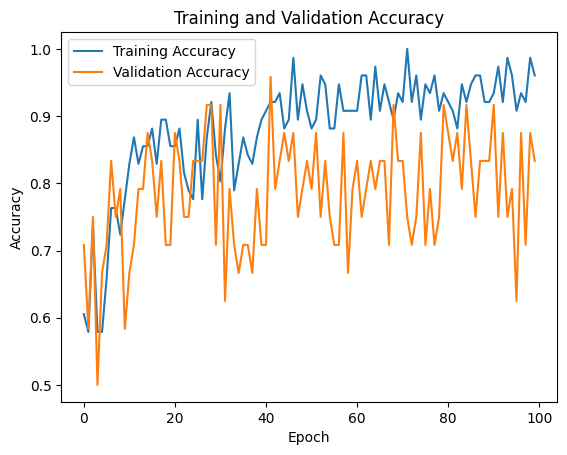

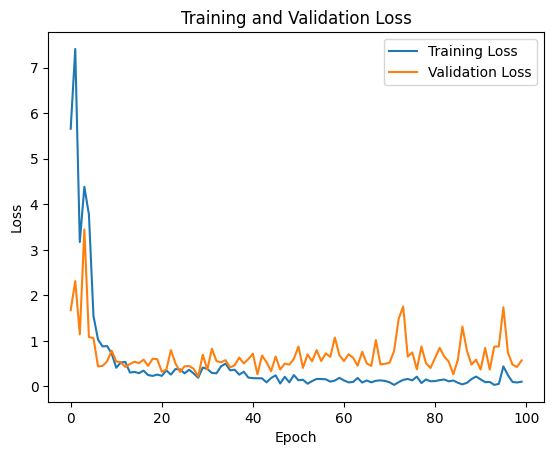

In [ ]:
# 손실함수, 정확도 그래프
#그래프 코드
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

# 정확도 그래프
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실률 그래프
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
image2=ImageDataGenerator(rescale=1/255.,
                        horizontal_flip=True,
                        rotation_range=10,
                        zoom_range=0.3)
test_gen = image2.flow_from_directory(test_path,
                                  batch_size=10,
                                  target_size=(224,224),
                                  classes=['OK_jpg','NG_jpg'],
                                  class_mode='binary',
                                  seed=2020)


Found 20 images belonging to 2 classes.


In [ ]:
# 모델 체크포인트 로드 전
loss,acc=score = model2.evaluate(test_gen, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:', round(score[1]*100,2))
# 모델 체크포인트 파일을 모델에 로드
model2.load_weights('tmp_checkpoint.ckpt')
loss,acc=score = model2.evaluate(test_gen, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:', round(score[1]*100,2))

Test loss: 232.61
Test accuracy: 85.0
Test loss: 61.2
Test accuracy: 80.0


In [ ]:
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 10
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i in range(num_images):
    img = Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/4. test_predict/test_jpg/"+test_pre[i])
    pre_y = model2.predict(img_test[i], verbose=0)
    target_y = img_label[i]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Predict: {'NG' if pre_y > 0.5 else 'OK'}\nLabel: {'NG' if target_y > 0.5 else 'OK'}")

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 증강
# 이미지 데이터 제너레이터 정의(Augmentation 적용,horizontal_flip=True,rotation_range=30,shear_range=0.15,zoom_range=0.3)
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL
image_gen_aug=ImageDataGenerator(rescale=1/255.,
                                 horizontal_flip=True,
                                 rotation_range=30,
                                 shear_range=0.15,
                                 zoom_range=0.3)

train_gen_aug = image_gen_aug.flow_from_directory(train_path,
                                                  batch_size=10,
                                                  target_size=(224,224),
                                                  classes=['OK_jpg','NG_jpg'],
                                                  class_mode='binary',
                                                  seed=2020)

valid_gen_aug = image_gen_aug.flow_from_directory(valid_path,
                                                  batch_size=10,
                                                  target_size=(224,224),
                                                  classes=['OK_jpg','NG_jpg'],
                                                  class_mode='binary',
                                                  seed=2020)


Found 76 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


(10, 224, 224, 3) (10,)


<ipython-input-36-7f94f2c876d5>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title(class_labels[labels[i].astype(np.int)])


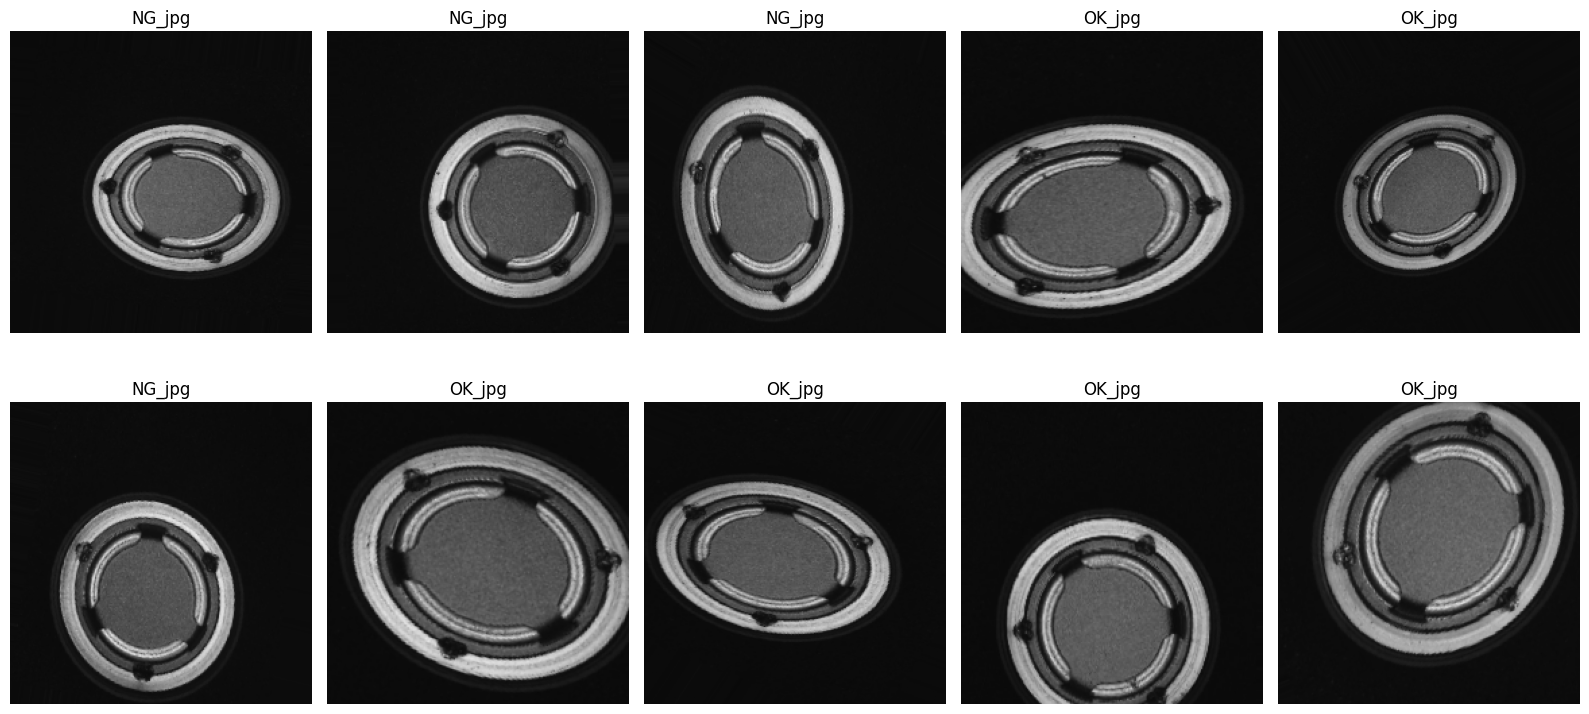

In [ ]:
# 샘플 이미지 출력

class_labels = ['OK_jpg','NG_jpg']
batch = next(train_gen_aug)
images,labels = batch[0],batch[1]
print(images.shape,labels.shape)

plt.figure(figsize=(16,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 모델 생성
model3 = build_model()

# 모델 컴파일
model3.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 체크포인트 설정
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt',
                                              save_weights_only=True,
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1)

In [ ]:
# 모델 훈련
history3=model3.fit(train_gen_aug,validation_data=valid_gen_aug,epochs=100, batch_size=10,callbacks=[checkpoint])

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 7.3218 - accuracy: 0.5132
Epoch 1: val_loss improved from inf to 2.89517, saving model to tmp_checkpoint.ckpt
8/8 [==============================] - 9s 602ms/step - loss: 7.3218 - accuracy: 0.5132 - val_loss: 2.8952 - val_accuracy: 0.5417
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 7.3468 - accuracy: 0.6184
Epoch 2: val_loss did not improve from 2.89517
8/8 [==============================] - 3s 343ms/step - loss: 7.3468 - accuracy: 0.6184 - val_loss: 3.5962 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 7.2809 - accuracy: 0.5395
Epoch 3: val_loss did not improve from 2.89517
8/8 [==============================] - 3s 344ms/step - loss: 7.2809 - accuracy: 0.5395 - val_loss: 3.6455 - val_accuracy: 0.6667
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 6.9318 - accuracy: 0.5526
Epoch 4: val_loss improved from 2.89517 to 1.09582, saving mode

In [ ]:
# 손실함수, 정확도 그래프
#그래프 코드
training_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']

# 정확도 그래프
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실률 그래프
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
image3=ImageDataGenerator(rescale=1/255.,
                          horizontal_flip=True,
                          rotation_range=30,
                          shear_range=0.15,
                          zoom_range=0.3)
test_gen_aug = image3.flow_from_directory(test_path,
                                  batch_size=10,
                                  target_size=(224,224),
                                  classes=['OK_jpg','NG_jpg'],
                                  class_mode='binary',
                                  seed=2020)

Found 20 images belonging to 2 classes.


In [ ]:
# 모델 체크포인트 로드 전
loss,acc=score = model3.evaluate(test_gen_aug, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:', round(score[1]*100,2))
# 모델 체크포인트 파일을 모델에 로드
model3.load_weights('tmp_checkpoint.ckpt')
loss,acc=score = model3.evaluate(test_gen_aug, verbose=0)
print('Test loss:', round(score[0]*100,2))
print('Test accuracy:', round(score[1]*100,2))

Test loss: 26.78
Test accuracy: 85.0
Test loss: 32.69
Test accuracy: 80.0


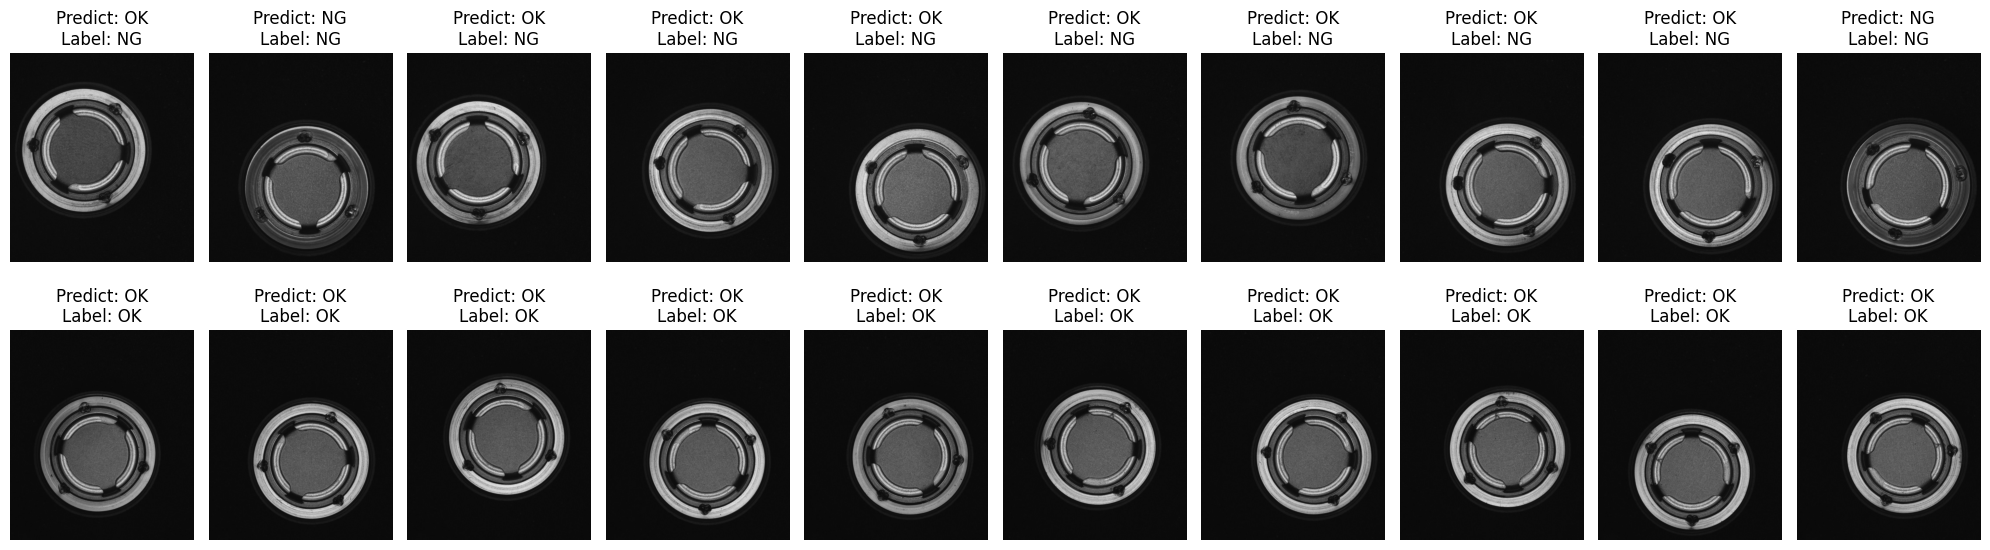

In [ ]:
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 10
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))

for i in range(num_images):
    img = Image.open("/content/drive/MyDrive/MNVISION/image/ng,ok/4. test_predict/test_jpg/"+test_pre[i])
    pre_y = model3.predict(img_test[i], verbose=0)
    target_y = img_label[i]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Predict: {'NG' if pre_y > 0.5 else 'OK'}\nLabel: {'NG' if target_y > 0.5 else 'OK'}")

plt.tight_layout()
plt.show()